In [1]:
import re
import os
import copy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from google.colab import drive
from skimage.io import imread
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as ks 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
arr=[]
labels = []
num_nonfaces =[]
image1 =[]
accff=[]
i=0
nonfaces=0
for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset"): 
  for name in files:
    if name.endswith("pgm") :
      root_folder = os.path.split(root)    
      image1 = imread(os.path.join(root,name))  
      image1.resize((92, 112))
      image1=image1.flatten(order='C')
      arr.append(image1)
      labels.append('0')
      i=i+1
     


In [4]:
image2 =[]
for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset3/11"): 
  for name in files:
      root_folder = os.path.split(root) ##   
      image2 = cv2.imread(os.path.join(root,name), 0)
      image2.resize((92, 112))
      image2=image2.flatten(order='C')
      nonfaces = nonfaces + 1
      arr.append(image2)
      labels.append('1')
      i=i+1
num_nonfaces.append(nonfaces)
arr=np.array(arr)   
labels=np.array(labels)    
print(labels.shape)       
print(arr.shape)
print(labels)            
print(nonfaces)

(550,)
(550, 10304)
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0

In [5]:
print(labels.shape)       
print(arr.shape)
print(labels)

(550,)
(550, 10304)
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0

In [6]:
# adding the data to a dataframe
df = pd.DataFrame(arr) 
df['label'] = pd.DataFrame(labels)
# sorting the data according to labels
df.sort_values("label", inplace=True)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
450,97,92,89,94,101,99,88,76,117,118,...,70,73,72,88,95,96,86,74,67,1
451,52,50,49,50,51,52,51,49,51,51,...,130,109,127,125,121,128,112,91,96,1
452,253,253,253,253,253,253,253,253,253,253,...,121,115,133,140,130,126,132,129,118,1
454,71,84,90,83,75,73,67,59,60,74,...,112,111,110,111,114,117,119,117,116,1
549,107,104,102,102,104,106,105,104,111,111,...,104,73,149,167,141,162,189,165,128,1


In [7]:
# seperating images from labels
Y = np.array(df['label'])
df = df.drop(axis=1, labels="label")

In [8]:
X_train = []
X_test =  []  
labels_train = []
labels_test =  []  

for i in range(0,550):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test)
print(labels_test[0])

[array([156, 158, 155, ..., 113, 110, 108], dtype=uint8), array([144, 144, 145, ...,  76,  78,  82], dtype=uint8), array([157, 154, 154, ..., 105, 110, 106], dtype=uint8), array([143, 144, 142, ...,  79,  79,  80], dtype=uint8), array([155, 154, 153, ..., 113, 110, 111], dtype=uint8), array([119, 120, 120, ...,  89,  94,  85], dtype=uint8), array([119, 121, 123, ...,  36,  40,  36], dtype=uint8), array([125, 124, 124, ...,  36,  35,  34], dtype=uint8), array([127, 131, 128, ...,  94,  84,  89], dtype=uint8), array([131, 125, 126, ...,  89,  93,  91], dtype=uint8), array([131, 128, 126, ...,  41,  40,  35], dtype=uint8), array([117, 112, 115, ...,  82,  82,  80], dtype=uint8), array([117, 114, 116, ...,  85,  89,  91], dtype=uint8), array([117, 115, 115, ...,  53,  46,  68], dtype=uint8), array([129, 127, 128, ...,  32,  35,  40], dtype=uint8), array([111, 111, 110, ...,  88,  79,  90], dtype=uint8), array([114, 110, 112, ...,  93,  89,  86], dtype=uint8), array([100, 110, 107, ...,  64

In [9]:
def LDA(arr, Y=None, noOfDims=None):
    # initializing the variables
    summ, lenn = 0, 0
    # computing the mean for each class
    mu = []
    Z =  []
    mu.append(np.mean(arr[0:399,:], axis=0 , keepdims=True).T) 
    mu.append(np.mean(arr[400:], axis=0, keepdims=True).T) 
       
    # computing the between class scatter matrices
    SB = np.matmul((mu[0]-mu[1]), (mu[0]-mu[1]).T)
    # centering the class matrices
    Z.append((arr[0:399,:] - mu[0].T))    
    Z.append((arr[400:,:] - mu[1].T))
    S = 0
    for i in range(len(Z)): S += np.matmul(Z[i].T, Z[i])
    # performing eigenvalue decomposition
    eigValues, eigVectors = np.linalg.eig(np.matmul(np.linalg.inv(S), SB))
    idx = eigValues.argsort()[::-1]
    eigValues = eigValues[idx]
    eigVectors = eigVectors[:,idx]
    # returning the dominant eigen vectors
    return eigVectors.T

    

In [10]:
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES

In [11]:
# saving the LDA output for later use
file_name = 'LDA_output.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(W, file)
    print(f'Object successfully saved to "{file_name}"')

Object successfully saved to "LDA_output.pkl"


In [12]:
def KNN(X_train, X_test, y_train, k):   
  # predicted label
  yPredicted = []
  for i in range(len(X_test)):
    # measuring the distance between that test point each train point
    dist = dict([(j, np.sqrt(np.sum((X_test[i] - X_train[j])**2))) for j in range(len(X_train))])
    # sorting the distances
    dist = sorted(dist.items(), key=lambda kv:(kv[1], kv[0]))
    # considering only the k closest points
    dist = dict(dist[:k])
    # print(dist)
    # creating a counter object to track the labels of k closest neighbors
    counter = Counter([y_train[k] for k in dist.keys()])
    # getting the most common label of all the nearest neighbors
    yPredicted.append(counter.most_common()[0][0])
    # print(counter.most_common()[0][0])
  return yPredicted

In [13]:
def projectData(X_train, X_test, W):
    X_train = np.array([np.matmul(W.T, X_train[i]) for i in range(X_train.shape[0])])
    X_test = np.array([np.matmul(W.T, X_test[i]) for i in range(X_test.shape[0])])
    return X_train, X_test

In [14]:
print("After LDA")
accur_afterLDA=[]
Z=W[:,:10]
#Z=Z.T
X_train_red, X_test_red = projectData(np.array(X_train), np.array(X_test), Z)
yhat = KNN(X_train_red, X_test_red, labels_train, 1)
accur_afterLDA.append(accuracy_score(labels_test, yhat))
print('150',accuracy_score(labels_test, yhat))

After LDA
150 0.9018181818181819


In [15]:
print(accur_afterLDA)

[0.9018181818181819]


In [16]:
file_name = 'LDA_output.pkl'
with open(file_name, 'rb') as file:
    W  = pickle.load(file)
    print(f'Object successfully loaded from "{file_name}"')

Object successfully loaded from "LDA_output.pkl"


In [17]:
arr=np.array(arr)

In [18]:
labels2 = []
arr2 =[]

for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset3/21"): 
  for name in files:
      root_folder = os.path.split(root)   
      image2 = cv2.imread(os.path.join(root,name), 0)
      image2.resize((92, 112))
      image2=image2.flatten(order='C')
      nonfaces = nonfaces + 1
      arr2.append(image2)
      labels2.append('1')
arr2=np.array(arr2)
arr = np.vstack((arr, arr2))
labels2=np.array(labels2)
labels = np.hstack((labels, labels2))  
num_nonfaces.append( nonfaces)           
print(labels.shape)       
print(arr.shape)


(650,)
(650, 10304)


In [19]:
print(nonfaces)

250


In [20]:
##### def AfterChanging_nonfaces():

X_train = []
X_test =  []  
labels_train = []
labels_test =  []  
for i in range(0,650):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test[0])
print(labels_test[0])
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
Z=W[:,:10]
#Z=Z.T
print("After LDA")
X_train_red, X_test_red = projectData(np.array(X_train), np.array(X_test), Z)
yhat = KNN(X_train_red, X_test_red, labels_train, 1)
accur_afterLDA.append(accuracy_score(labels_test, yhat))
print((398+nonfaces),accuracy_score(labels_test, yhat))
accff.append(accuracy_score(labels_test, yhat))
#print(X_test_red)
#print("Training Set Accuracy: {}\nTesting  Set Accuracy: {}".format(train_score, test_score))
print(nonfaces)
print(accff )

[156 158 155 ... 113 110 108]
0
After LDA
648 0.8892307692307693
250
[0.8892307692307693]


In [21]:
print(accur_afterLDA)

[0.9018181818181819, 0.8892307692307693]


In [22]:
labels2 = []
arr2 =[]

for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset3/5"): 
  for name in files:
      root_folder = os.path.split(root)   
      image2 = cv2.imread(os.path.join(root,name), 0)
      image2.resize((92, 112))
      image2=image2.flatten(order='C')
      nonfaces = nonfaces + 1
      arr2.append(image2)
      labels2.append('1')
      
num_nonfaces.append( nonfaces)           
arr2=np.array(arr2)
arr = np.vstack((arr, arr2))
labels2=np.array(labels2)
labels = np.hstack((labels, labels2))
print(labels.shape)       
print(arr.shape)
#print(labels)    


(850,)
(850, 10304)


In [23]:
print(labels.shape)       
print(arr.shape)
#print(labels)    

(850,)
(850, 10304)


In [24]:

X_train = []
X_test =  []  
labels_train = []
labels_test =  []  
for i in range(0,(398+nonfaces)):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test[0])
print(labels_test[0])
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES


[156 158 155 ... 113 110 108]
0


In [25]:
Z=W[:,:10]
#Z=Z.T
print("After LDA")
X_train_red, X_test_red = projectData(np.array(X_train), np.array(X_test), Z)
yhat = KNN(X_train_red, X_test_red, labels_train, 1)
accur_afterLDA.append(accuracy_score(labels_test, yhat))
print((398+nonfaces),accuracy_score(labels_test, yhat))
accff.append(accuracy_score(labels_test, yhat))
print(nonfaces)
print(accur_afterLDA )

After LDA
848 0.8702830188679245
450
[0.9018181818181819, 0.8892307692307693, 0.8702830188679245]


In [26]:
labels2 = []
arr2 =[]

for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset3/6"): 
  for name in files:
      root_folder = os.path.split(root)   
      image2 = cv2.imread(os.path.join(root,name), 0)
      image2.resize((92, 112))
      image2=image2.flatten(order='C')
      nonfaces = nonfaces + 1
      arr2.append(image2)
      labels2.append('1')
      
num_nonfaces.append( nonfaces)           
arr2=np.array(arr2)
arr = np.vstack((arr, arr2))
labels2=np.array(labels2)
labels = np.hstack((labels, labels2))
print(labels.shape)       
print(arr.shape)
#print(labels)


(1050,)
(1050, 10304)


In [27]:
#Call the cell of
#AfterChanging_nonfaces()
#Call the cell of
#AfterChanging_nonfaces()
##### def AfterChanging_nonfaces():

X_train = []
X_test =  []  
labels_train = []
labels_test =  []  
for i in range(0,(398+nonfaces)):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test[0])
print(labels_test[0])
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
Z=W[:,:10]
#Z=Z.T
print("After LDA")
X_train_red, X_test_red = projectData(np.array(X_train), np.array(X_test), Z)
yhat = KNN(X_train_red, X_test_red, labels_train, 1)
accur_afterLDA.append(accuracy_score(labels_test, yhat))
print((398+nonfaces),accuracy_score(labels_test, yhat))
accff.append(accuracy_score(labels_test, yhat))
#print(X_test_red)
#print("Training Set Accuracy: {}\nTesting  Set Accuracy: {}".format(train_score, test_score))
print(nonfaces)
print(accur_afterLDA )

[156 158 155 ... 113 110 108]
0
After LDA
1048 0.8816793893129771
650
[0.9018181818181819, 0.8892307692307693, 0.8702830188679245, 0.8816793893129771]


In [28]:
labels2 = []
arr2 =[]

for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset3/1"): 
  for name in files:
      root_folder = os.path.split(root)   
      image2 = cv2.imread(os.path.join(root,name), 0)
      image2.resize((92, 112))
      image2=image2.flatten(order='C')
      nonfaces = nonfaces + 1
      arr2.append(image2)
      labels2.append('1')
      
num_nonfaces.append( nonfaces)           
arr2=np.array(arr2)
arr = np.vstack((arr, arr2))
labels2=np.array(labels2)
labels = np.hstack((labels, labels2))
print(labels.shape)       
print(arr.shape)
#print(labels)


(1437,)
(1437, 10304)


In [29]:
#Call the cell of
#AfterChanging_nonfaces()
#Call the cell of
#AfterChanging_nonfaces()
#Call the cell of
#AfterChanging_nonfaces()
##### def AfterChanging_nonfaces():

X_train = []
X_test =  []  
labels_train = []
labels_test =  []  
for i in range(0,(398+nonfaces)):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test[0])
print(labels_test[0])
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
Z=W[:,:10]
#Z=Z.T
print("After LDA")
X_train_red, X_test_red = projectData(np.array(X_train), np.array(X_test), Z)
yhat = KNN(X_train_red, X_test_red, labels_train, 1)
accur_afterLDA.append(accuracy_score(labels_test, yhat))
print((398+nonfaces),accuracy_score(labels_test, yhat))
accff.append(accuracy_score(labels_test, yhat))
#print(X_test_red)
#print("Training Set Accuracy: {}\nTesting  Set Accuracy: {}".format(train_score, test_score))
print(nonfaces)
print(accur_afterLDA )
print(num_nonfaces)

[156 158 155 ... 113 110 108]
0
After LDA
1435 0.883008356545961
1037
[0.9018181818181819, 0.8892307692307693, 0.8702830188679245, 0.8816793893129771, 0.883008356545961]
[150, 250, 450, 650, 1037]


In [30]:
print(labels_test)
print(labels.shape)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [31]:
accur_afterLDA=np.array(accur_afterLDA)

In [32]:
print(accur_afterLDA )
print(num_nonfaces)

[0.90181818 0.88923077 0.87028302 0.88167939 0.88300836]
[150, 250, 450, 650, 1037]


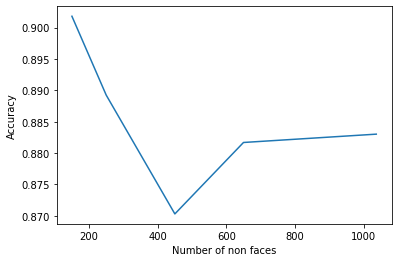

In [33]:
plt.plot(num_nonfaces , accur_afterLDA)
plt.xlabel('Number of non faces')
plt.ylabel('Accuracy')
plt.show()

In [34]:
####################################################################################################################

In [37]:
print(labels)

['0' '0' '0' ... '1' '1' '1']


In [35]:
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
W = LDA(arr, noOfDims=2)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES

In [36]:
#### 7.iii
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc=[]
s=[]
f=[]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, labels_train)
#before reduction
#pred = knn.predict(X_test)
#print('labels test',labels_test)
#print(pred)
knn.score(X_test, labels_test)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
print(knn.score(X_test_red, labels_test))
pred = knn.predict(X_test_red)
print(accuracy_score(pred,labels_test))
acc.append(accuracy_score(pred,labels_test))

pred = knn.predict(X_test_red)
#print(X_test_red,labels_test)
#print('labels test',labels_test)
#print(pred)
for i in range(len(pred)):
    if(labels_test[i] != pred[i]):
       f.append([X_test_red[i],labels_test[i]])
    else:
       s.append([X_test_red[i],labels_test[i]])
print(f[0])       

ValueError: ignored

In [ ]:
def KMC(X, k, epsilon=0.01, maxIter=100):
  # initializing the error to be max at first
  err = float('inf')
  # randomly initializing the centroids
  centroid = [X[np.random.randint(0, len(X)-1)] for i in range(k)]
  while maxIter > 0 and err >= epsilon:
    maxIter -= 1
    cluster = [[] for i in range(k)]
    # copying the old centroids
    oldCentroid = copy.deepcopy(centroid)
    # assigning each data point to closest cluster
    for x in X:
      minn, j = float('inf'), 0
      for i in range(len(centroid)):
        dist = np.linalg.norm(x-centroid[i]) ** 2
        if dist < minn: minn, j = dist, i
      cluster[j].append(x)
    # updating the centroids
    for i in range(len(cluster)):
      if len(cluster[i]) != 0: centroid[i] = sum(cluster[i]) / len(cluster[i])
    # if centroids didn't change, then terminate
    err = 0
    for i in range(len(centroid)):
      err += np.linalg.norm(centroid[i] - oldCentroid[i]) ** 2
  return cluster